# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import pycountry
import plotly.express as px
import warnings; 
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('cleaned/cleaned_data2.csv')

## Analysing Impact of Education on Compensation

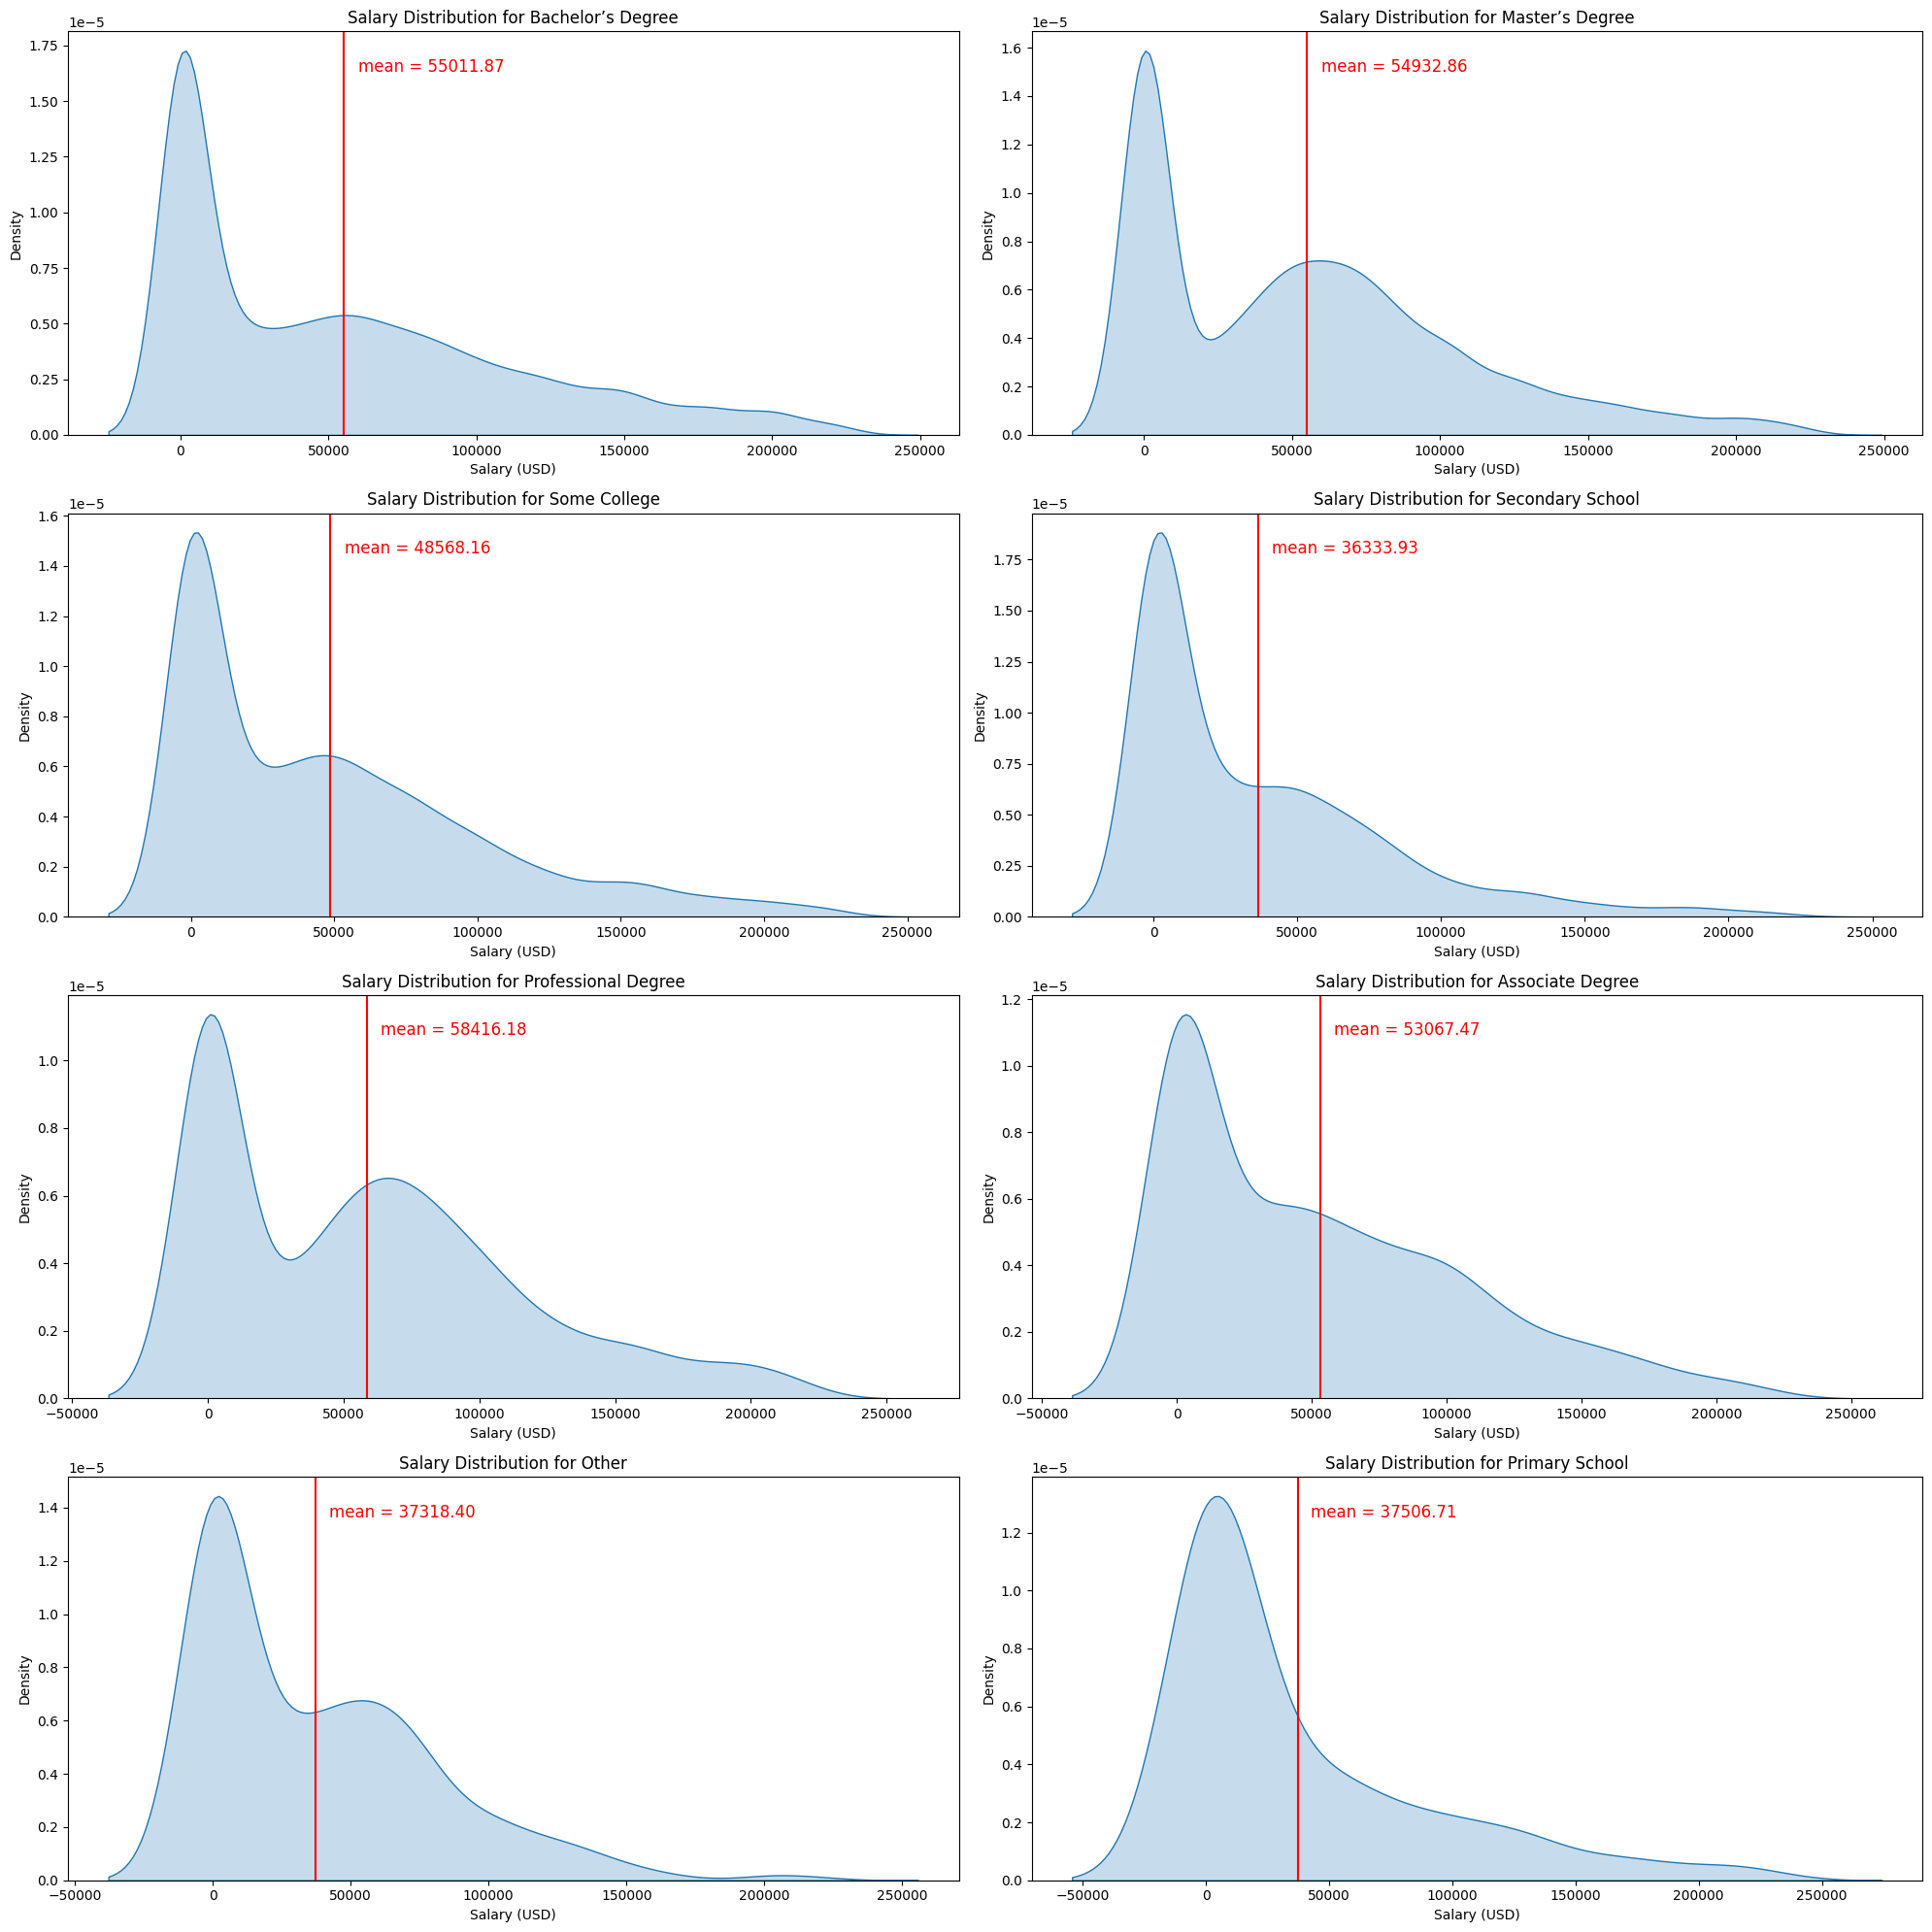

In [3]:
# Set the figure size and number of rows/columns in the subplot grid
fig = plt.figure(figsize=(20, 20))

# Get education levels and number of plots needed
education = df['EdLevel'].value_counts().sort_values(ascending=False).index.tolist()
num_plots = len(education)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate number of rows needed

# Loop over education levels and plot KDEs
for i, edu in enumerate(education):
    ax = fig.add_subplot(num_rows, num_cols, i + 1)
    
    # Filter salaries for the current education level
    temp_salaries = df.loc[df['EdLevel'] == edu, 'CompTotalUSD']
    
    # Plot the KDE for salary distribution
    sns.kdeplot(temp_salaries, shade=True, ax=ax)
    
    # Calculate the mean salary
    mean_value = temp_salaries.mean()
    
    # Plot a vertical line for the mean and add a label
    ax.axvline(mean_value, linestyle='-', color='red')
    ax.text(mean_value + 5000,  # Adjust the text offset (absolute)
            ax.get_ylim()[1] * 0.9,  # 90% up the y-axis
            f'mean = {mean_value:.2f}', 
            fontsize=12, 
            color='red')
    
    # Set titles and labels
    ax.set_title(f'Salary Distribution for {edu}')
    ax.set_xlabel('Salary (USD)')
    ax.set_ylabel('Density')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

## Distribution of Surveyors based on their developer role

In [4]:

surveyors = df['DevType'].str.split(';').explode().value_counts()
surveyors

DevType
Developer, full-stack                            14684
Developer, back-end                               7959
Developer, front-end                              2491
Developer, desktop or enterprise applications     1976
Developer, mobile                                 1536
Developer, embedded applications or devices       1341
Other (please specify):                           1173
Data engineer                                      920
Engineering manager                                878
DevOps specialist                                  820
Academic researcher                                787
Data scientist or machine learning specialist      766
Research & Development role                        736
Senior Executive (C-Suite, VP, etc.)               537
Cloud infrastructure engineer                      469
Developer, game or graphics                        415
Student                                            414
Developer, QA or test                              393
De

In [5]:
surveyors = surveyors/surveyors.sum()
surveyors.head(5)

DevType
Developer, full-stack                            0.354926
Developer, back-end                              0.192376
Developer, front-end                             0.060210
Developer, desktop or enterprise applications    0.047762
Developer, mobile                                0.037127
Name: count, dtype: float64

Text(0, 0.5, 'Percentages')

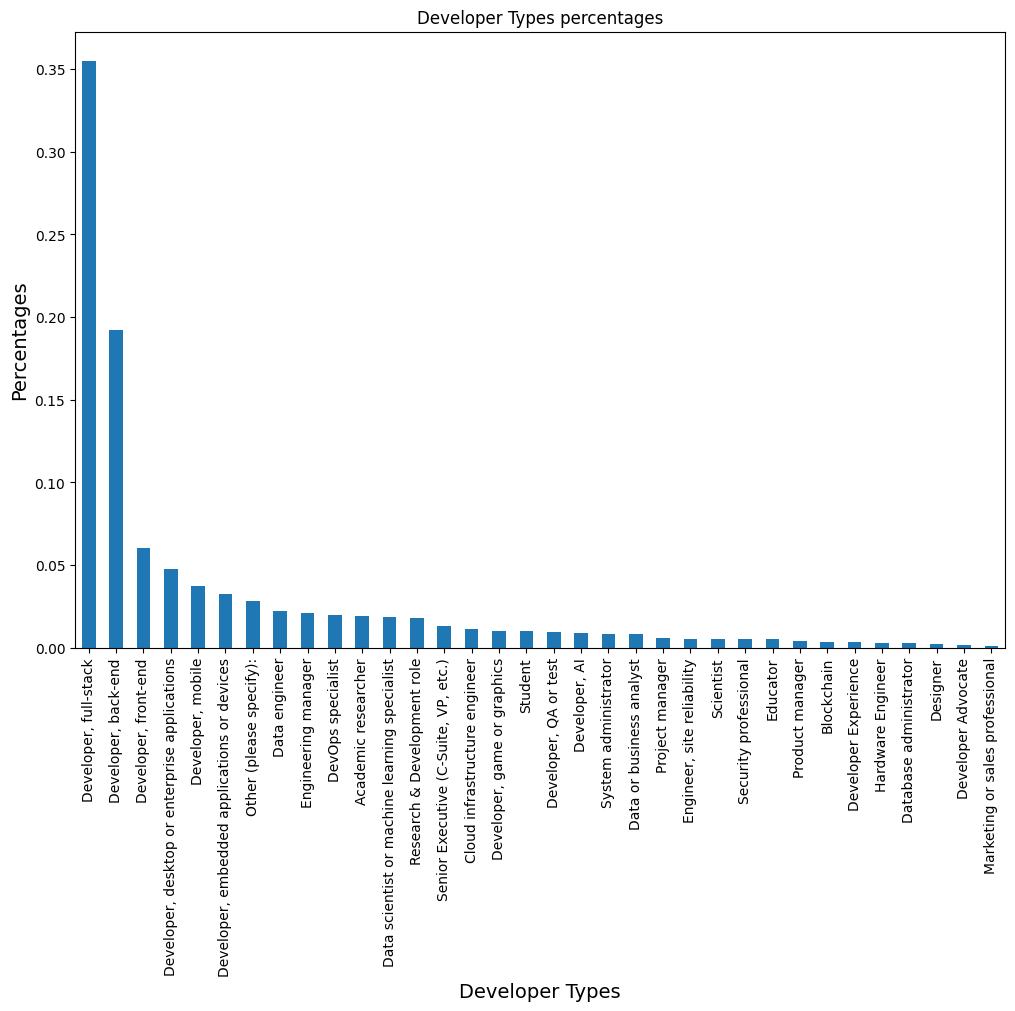

In [6]:
(surveyors/surveyors.sum()).plot(kind='bar', figsize=(12,8))
plt.title('Developer Types percentages')
plt.xlabel('Developer Types', fontsize = 14)
plt.ylabel('Percentages', fontsize = 14)


## Programming Languages Trend

In [7]:
# Step 1: Process 'LanguageHaveWorkedWith'
language_worked = df['LanguageHaveWorkedWith'].str.split(';').explode().value_counts().reset_index()
language_worked.columns = ['Language', 'Count_Worked']

# Step 2: Process 'LanguageWantToWorkWith'
language_want = df['LanguageWantToWorkWith'].str.split(';').explode().value_counts().reset_index()
language_want.columns = ['Language', 'Count_Want']

# Step 3: Merge the two DataFrames
language = pd.merge(language_worked, language_want, on='Language', how='outer')

# Display the merged DataFrame
print(language)

                   Language  Count_Worked  Count_Want
0                       Ada           243         276
1                      Apex           322         231
2                  Assembly          1681        1513
3   Bash/Shell (all shells)         14723       10220
4                         C          7103        4929
5                        C#         11746        9831
6                       C++          8307        6695
7                   Clojure           520         965
8                     Cobol           246         213
9                   Crystal           140         234
10                     Dart          2400        2585
11                   Delphi           801         426
12                   Elixir           926        2213
13                   Erlang           360         819
14                       F#           344         954
15                  Fortran           401         257
16                 GDScript           760         958
17                       Go 

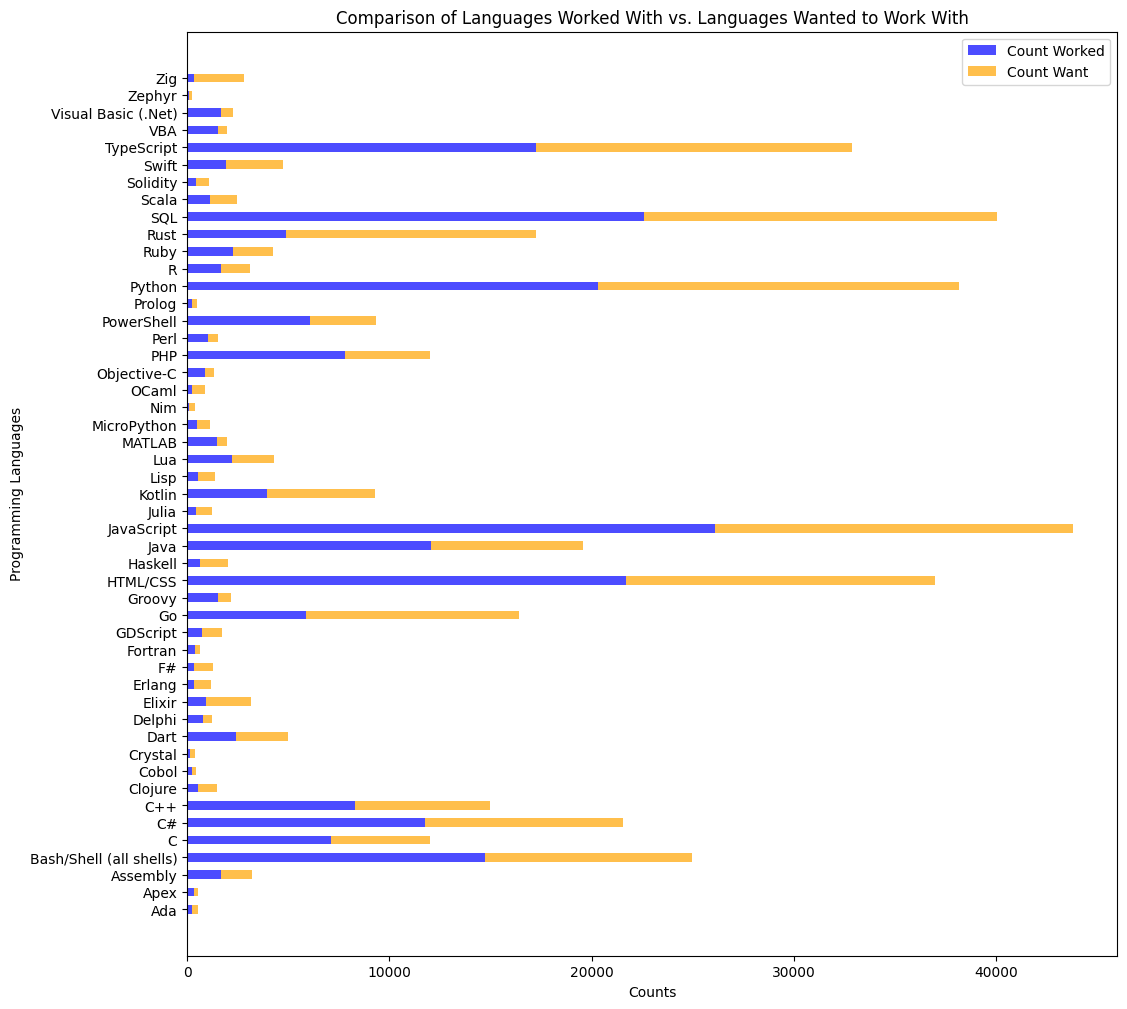

In [8]:
plt.figure(figsize=(12, 12))

# Create horizontal bar plots for both counts
bar_width = 1
spacing = 1 # Increase this value for more space between languages
y = [i * (1 + spacing) for i in range(len(language))]  # Adjust y positions

plt.barh(y, language['Count_Worked'], height=bar_width, label='Count Worked', color='blue', alpha=0.7)
plt.barh(y, language['Count_Want'], height=bar_width, left=language['Count_Worked'], label='Count Want', color='orange', alpha=0.7)

# Adding labels and title
plt.ylabel('Programming Languages')
plt.xlabel('Counts')
plt.title('Comparison of Languages Worked With vs. Languages Wanted to Work With')
plt.yticks(y, language['Language'])
plt.legend()

# Show plot
# plt.tight_layout()
plt.show()

## Platform Trend

In [9]:
# Step 1: Process 'LanguageHaveWorkedWith'
language_worked = df['LanguageHaveWorkedWith'].str.split(';').explode().value_counts().reset_index()
language_worked.columns = ['Language', 'Count_Worked']

# Step 2: Process 'LanguageWantToWorkWith'
language_want = df['LanguageWantToWorkWith'].str.split(';').explode().value_counts().reset_index()
language_want.columns = ['Language', 'Count_Want']

# Step 3: Merge the two DataFrames
language = pd.merge(language_worked, language_want, on='Language', how='outer')

# Display the merged DataFrame
print(language)

                   Language  Count_Worked  Count_Want
0                       Ada           243         276
1                      Apex           322         231
2                  Assembly          1681        1513
3   Bash/Shell (all shells)         14723       10220
4                         C          7103        4929
5                        C#         11746        9831
6                       C++          8307        6695
7                   Clojure           520         965
8                     Cobol           246         213
9                   Crystal           140         234
10                     Dart          2400        2585
11                   Delphi           801         426
12                   Elixir           926        2213
13                   Erlang           360         819
14                       F#           344         954
15                  Fortran           401         257
16                 GDScript           760         958
17                       Go 

In [10]:
platform_worked = df['PlatformHaveWorkedWith'].str.split(';').explode().value_counts().reset_index()
platform_worked.columns = ['Platform', 'Count_Worked']

platform_want = df['PlatformWantToWorkWith'].str.split(';').explode().value_counts().reset_index()
platform_want.columns = ['Platform', 'Count_Want']

platform = pd.merge(platform_worked, platform_want, on='Platform', how='outer')

platform

,Platform,Count_Worked,Count_Want
0,Alibaba Cloud,282.0,308.0
1,Amazon Web Services (AWS),16987.0,14344.0
2,Cloudflare,4887.0,5017.0
3,Colocation,197.0,224.0
4,Databricks,660.0,882.0
5,Digital Ocean,4093.0,3464.0
6,Firebase,4413.0,3490.0
7,Fly.io,855.0,1259.0
8,Google Cloud,8294.0,7362.0
9,Heroku,2653.0,1191.0


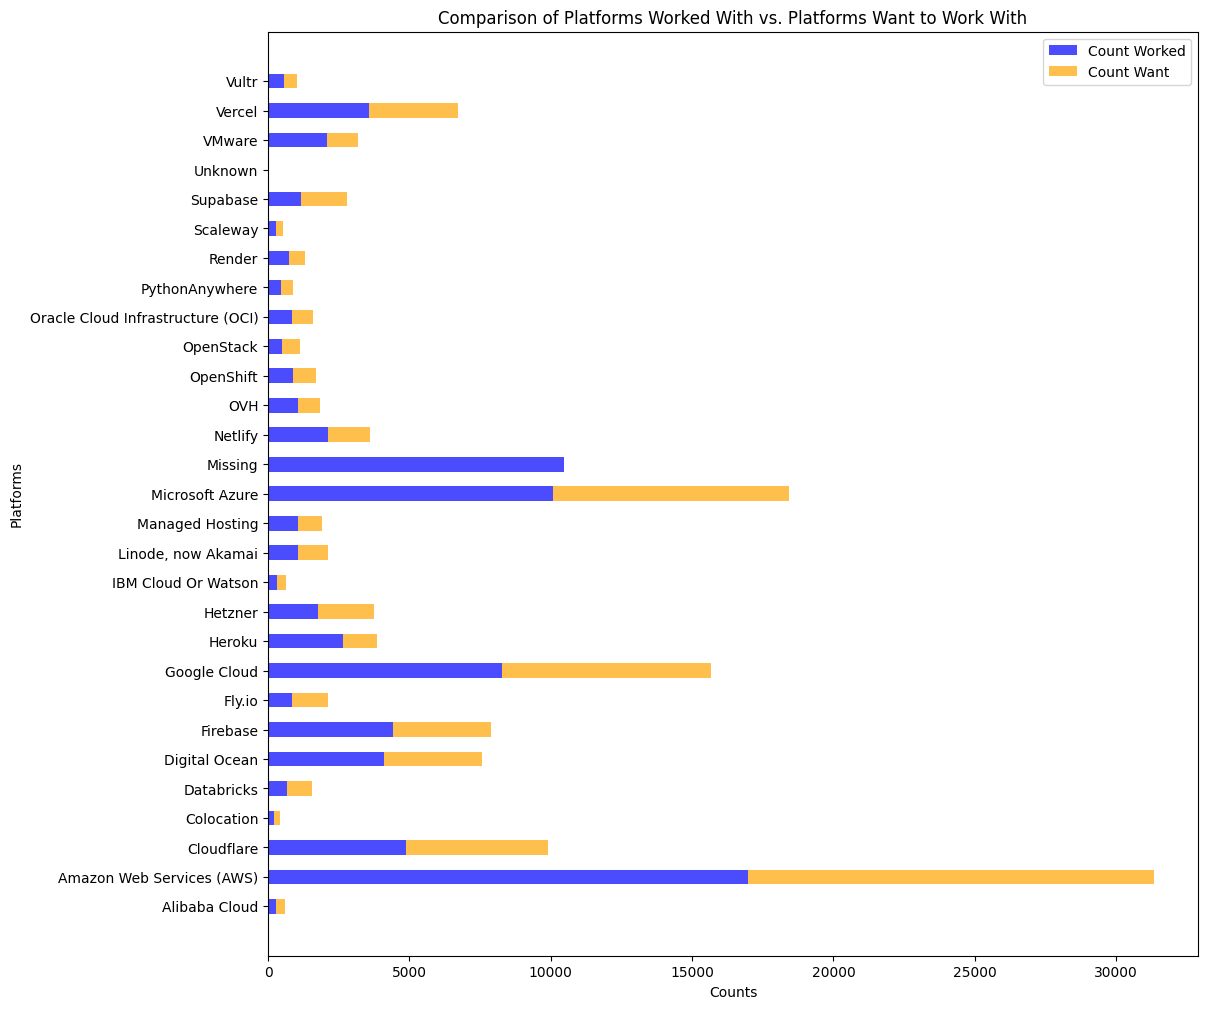

In [11]:
plt.figure(figsize=(12, 12))

# Create horizontal bar plots for both counts
bar_width = 1
spacing = 1 # Increase this value for more space between languages
y = [i * (1 + spacing) for i in range(len(platform))]  # Adjust y positions

plt.barh(y, platform['Count_Worked'], height=bar_width, label='Count Worked', color='blue', alpha=0.7)
plt.barh(y, platform['Count_Want'], height=bar_width, left=platform['Count_Worked'], label='Count Want', color='orange', alpha=0.7)

# Adding labels and title
plt.ylabel('Platforms')
plt.xlabel('Counts')
plt.title('Comparison of Platforms Worked With vs. Platforms Want to Work With')
plt.yticks(y, platform['Platform'])
plt.legend()

# Show plot
# plt.tight_layout()
plt.show()

## Impact of experience on compensation

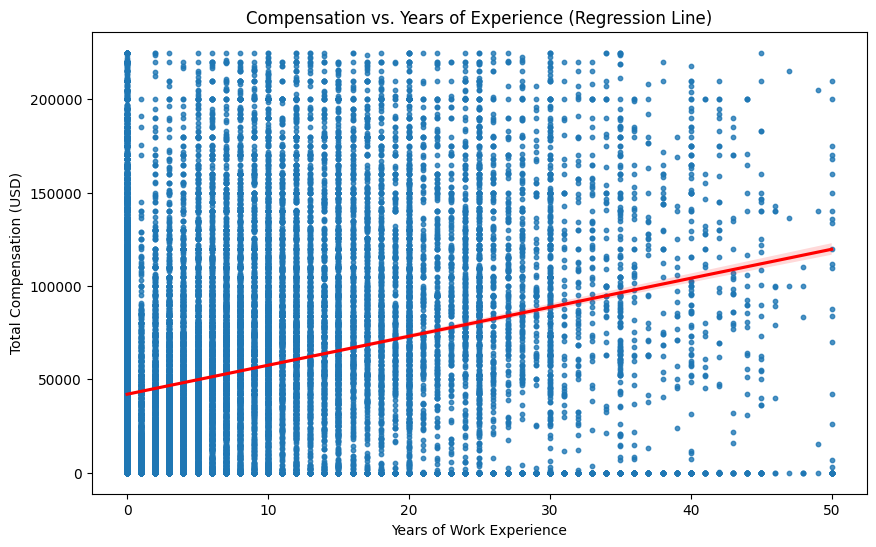

In [12]:
# Create a regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='WorkExp', y='CompTotalUSD', data=df, scatter_kws={'s': 10}, line_kws={'color':'red'}, ci=95)

# Add labels and title
plt.xlabel('Years of Work Experience')
plt.ylabel('Total Compensation (USD)')
plt.title('Compensation vs. Years of Experience (Regression Line)')

plt.show()

## Impact of Age on Job Satisfaction

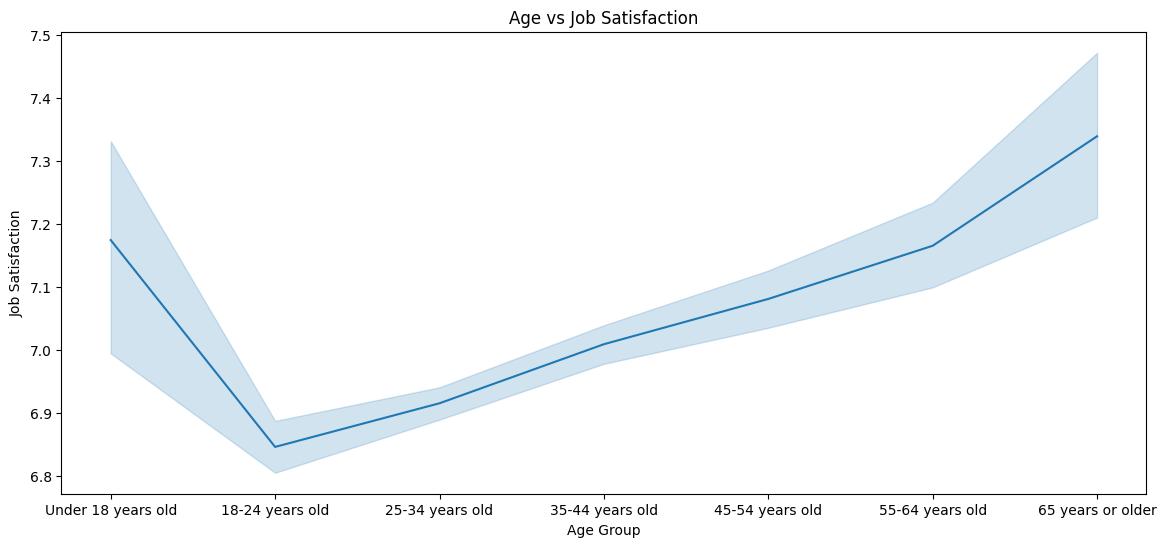

In [13]:
# Define custom order for the Age categories
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old',
             '35-44 years old', '45-54 years old', '55-64 years old',
             '65 years or older']

# Exclude 'Prefer not to say' and reorder the Age column
df_filtered = df[df['Age'] != 'Prefer not to say']
df_filtered['Age'] = pd.Categorical(df_filtered['Age'], categories=age_order, ordered=True)

# Sort by the new Age ordering
df_filtered = df_filtered.sort_values('Age')

# Create the line plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_filtered, x='Age', y='JobSat')

# Add title and labels
plt.title('Age vs Job Satisfaction')
plt.xlabel('Age Group')
plt.ylabel('Job Satisfaction')
plt.show()

## Job Satisfaction Based on Work Experience

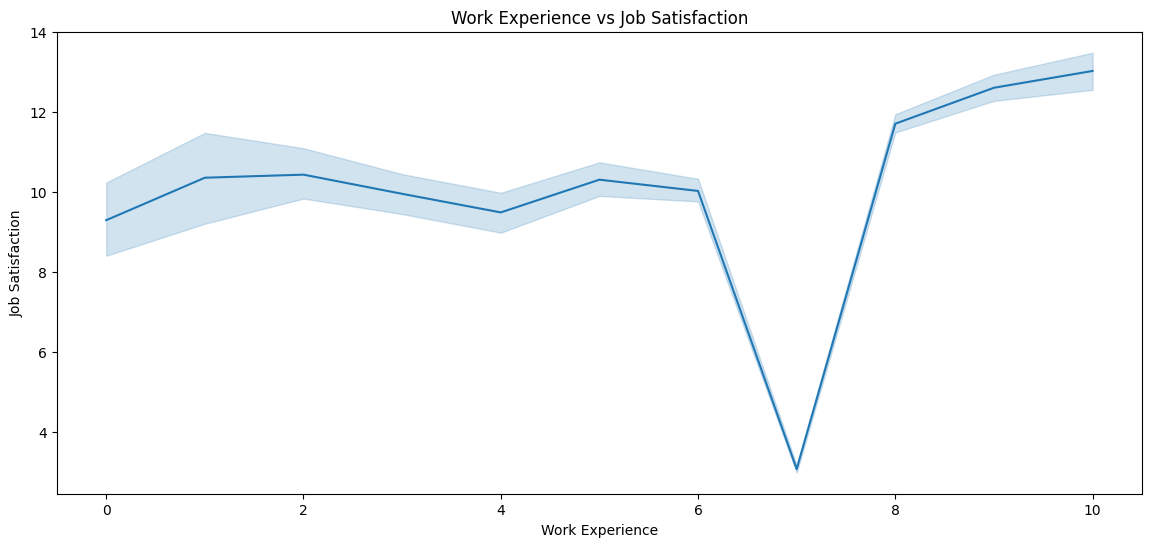

In [14]:
df_filtered = df.sort_values(by='WorkExp')

# Create the line plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_filtered, x='JobSat', y='WorkExp')

# Add title and labels
plt.title('Work Experience vs Job Satisfaction')
plt.xlabel('Work Experience')
plt.ylabel('Job Satisfaction')
plt.show()

## Relation between Job Satisfaction and Remote Work

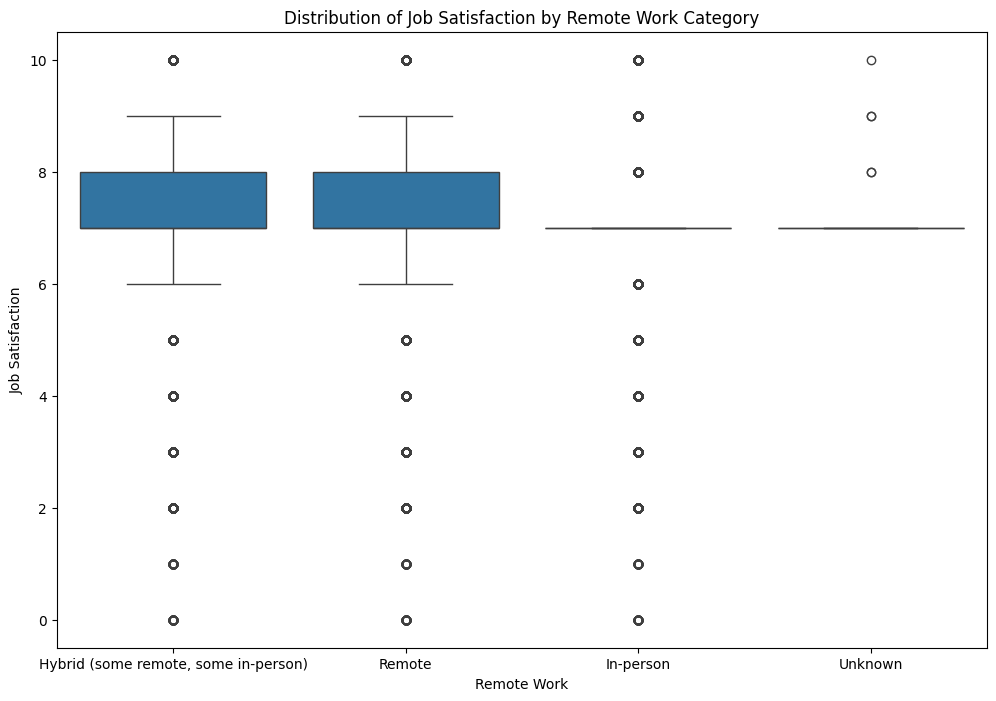

In [15]:
# Create the boxplot to show the distribution of Job Satisfaction for each RemoteWork category
plt.figure(figsize=(12, 8))
sns.boxplot(x='RemoteWork', y='JobSat', data=df)

# Add title and labels
plt.title('Distribution of Job Satisfaction by Remote Work Category')
plt.xlabel('Remote Work')
plt.ylabel('Job Satisfaction')

plt.show()